In [1]:
import networkx as nx
import osmnx as ox

%matplotlib inline
ox.__version__

'1.2.2'

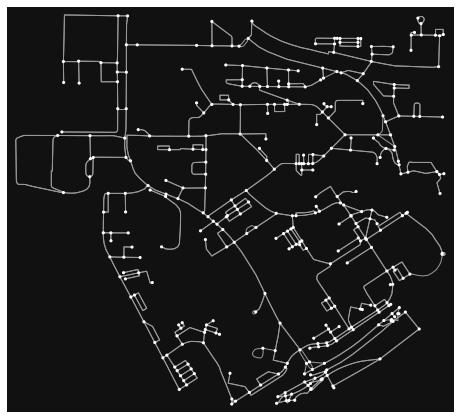

In [14]:
kaist = (36.3709,127.3613)

G = ox.graph_from_point(kaist, dist=750, network_type = "bike")
fig, ax = ox.plot_graph(G, node_size=10)

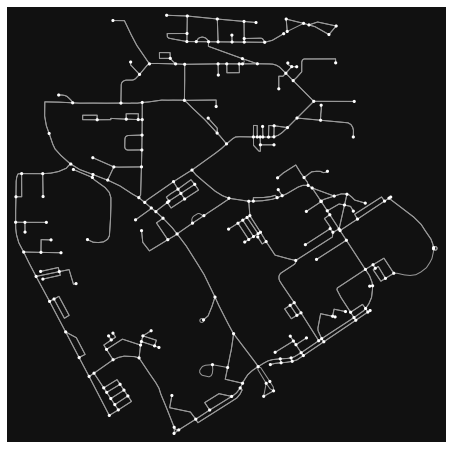

In [15]:
# you can convert your graph to node and edge GeoPandas GeoDataFrames
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
# print(gdf_nodes)
new_gdf = gdf_nodes
new_gdf1 = new_gdf[-0.5157593123218502 * new_gdf.x + new_gdf.y < -29.323675157711996]
G_new = G
for i in new_gdf1.index:
    try:
        G_new.remove_node(i)
    except:
        pass
   
new_gdf2 = new_gdf[-0.6590909090895878* new_gdf.x + new_gdf.y < -47.579106363468064]

for i in new_gdf2.index:
    try:
        G_new.remove_node(i)
    except:
        pass

new_gdf = gdf_nodes[gdf_nodes.x < 127.3564 ]
new_gdf = new_gdf[new_gdf.y > 36.37165]

for i in new_gdf.index:
    try:
        G_new.remove_node(i)
    except:
        pass
    
new_gdf = gdf_nodes[gdf_nodes.y > 36.37588]
new_gdf
for i in new_gdf.index:
    try:
        G_new.remove_node(i)
    except:
        pass
    
new_gdf = gdf_nodes
new_gdf2 = new_gdf[2.297872340464131* new_gdf.x + new_gdf.y > 329.0468246857673]
new_gdf2 = new_gdf2[new_gdf2.y > 36.37037]
for i in new_gdf2.index:
    try:
        G_new.remove_node(i)
    except:
        pass

new_gdf = gdf_nodes
new_gdf = new_gdf[new_gdf.y >36.37266]
new_gdf = new_gdf[new_gdf.y <36.37304]
new_gdf = new_gdf[new_gdf.x >127.36686]
new_gdf = new_gdf[new_gdf.x <127.36720]
for i in new_gdf.index:
    try:
        G_new.remove_node(i)
    except:
        pass

G_new.remove_node(10093887420)    
fig, ax = ox.plot_graph(G_new, node_size=10)

In [16]:
# 임의의 point 에서 가장 가까운 node 찾을 수 있음
nodes, dists = ox.nearest_nodes(G, 127.36665, 36.37335 , return_dist=True)
print(f'node id {nodes}')
print(f'dist {dists}')

node id 4731581478
dist 19.000843436110124


In [5]:
# randomly sample n points spatially-constrained to the network's geometry
Gp = ox.project_graph(G_new)
points = ox.utils_geo.sample_points(ox.get_undirected(Gp), n=100)
X = points.x.values
Y = points.y.values
X0 = X.mean()
Y0 = Y.mean()

In [6]:
node = ox.nearest_nodes(Gp, X0, Y0)
node

2293544759

In [7]:
orig = list(G_new)[124]
orig

2293584748

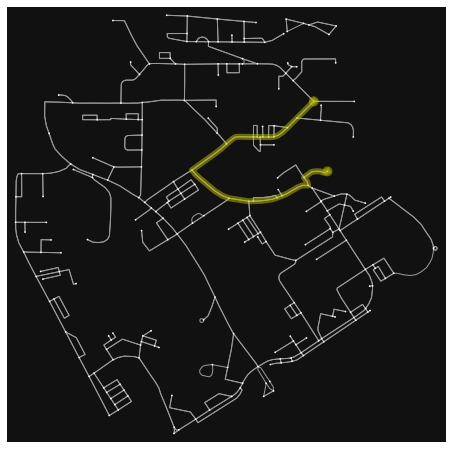

In [11]:
orig = 317557510
dest = 2293584748
# G_new.edges

route = ox.shortest_path(G_new, orig, dest)
fig, ax = ox.plot_graph_route(G_new, route, route_color="y", route_linewidth=6, node_size=3)

[317557510, 4627817988]